In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path= r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\A6-Advanced Analytics & Dashboard Design\20-01-24 NY Citi Bike project'


In [3]:
# import citi_clean datset
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citi_derived.csv'),index_col = False)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               49977 non-null  int64  
 1   trip_id                  49977 non-null  object 
 2   bike_id                  49977 non-null  int64  
 3   day_of_week              49977 non-null  object 
 4   start_hour               49977 non-null  int64  
 5   start_time               49977 non-null  object 
 6   start_station_id         49977 non-null  int64  
 7   start_station_name       49977 non-null  object 
 8   start_station_latitude   49977 non-null  float64
 9   start_station_longitude  49977 non-null  float64
 10  end_time                 49977 non-null  object 
 11  end_station_id           49977 non-null  int64  
 12  end_station_name         49977 non-null  object 
 13  end_station_latitude     49977 non-null  float64
 14  end_station_longitude 

In [5]:
df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,age,Trip Range,age_category
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,40.742388,-73.997262,993,Subscriber,1968,Female,16,45,long trip,Middle Age
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,40.728419,-73.987140,581,Subscriber,1983,Male,9,30,average trip,Adult
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,40.768254,-73.988639,361,Subscriber,1989,Male,6,24,average trip,Young Adult
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,40.756014,-73.967416,561,Subscriber,1988,Female,9,25,average trip,Young Adult
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,40.743943,-73.979661,2296,Non-Subscriber,1978,unknown,38,35,long trip,Adult


In [6]:
# Drop the 'unwanted_column' from the DataFrame
df_clean = df.drop('Unnamed: 0', axis=1)

In [7]:
df_clean.head()


,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,age,Trip Range,age_category
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,40.742388,-73.997262,993,Subscriber,1968,Female,16,45,long trip,Middle Age
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,40.728419,-73.987140,581,Subscriber,1983,Male,9,30,average trip,Adult
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,40.768254,-73.988639,361,Subscriber,1989,Male,6,24,average trip,Young Adult
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,40.756014,-73.967416,561,Subscriber,1988,Female,9,25,average trip,Young Adult
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,40.743943,-73.979661,2296,Non-Subscriber,1978,unknown,38,35,long trip,Adult


## Exploring Relationships


### Subset of relevant variables for analysis

In [8]:
df_clean.dtypes


trip_id                     object
bike_id                      int64
day_of_week                 object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                      object
trip_duration_minutes        int64
age                          int64
Trip Range                  object
age_category                object
dtype: object

In [9]:
df_selected= df_clean[['start_hour', 'trip_duration_minutes', 'age']]


In [10]:
df_selected.head()


,start_hour,trip_duration_minutes,age
0,18,16,45
1,18,9,30
2,19,6,24
3,11,9,25
4,18,38,35


### Correlation

In [11]:
# Create a correlation matrix using pandas
df_selected.corr()

,start_hour,trip_duration_minutes,age
start_hour,1.000000,0.041223,-0.062348
trip_duration_minutes,0.041223,1.000000,0.015130
age,-0.062348,0.015130,1.000000


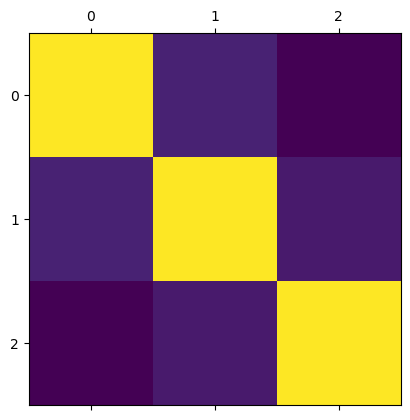

In [12]:
# create a correlation heatmap using matplotlib
plt.matshow(df_selected.corr())
plt.show()

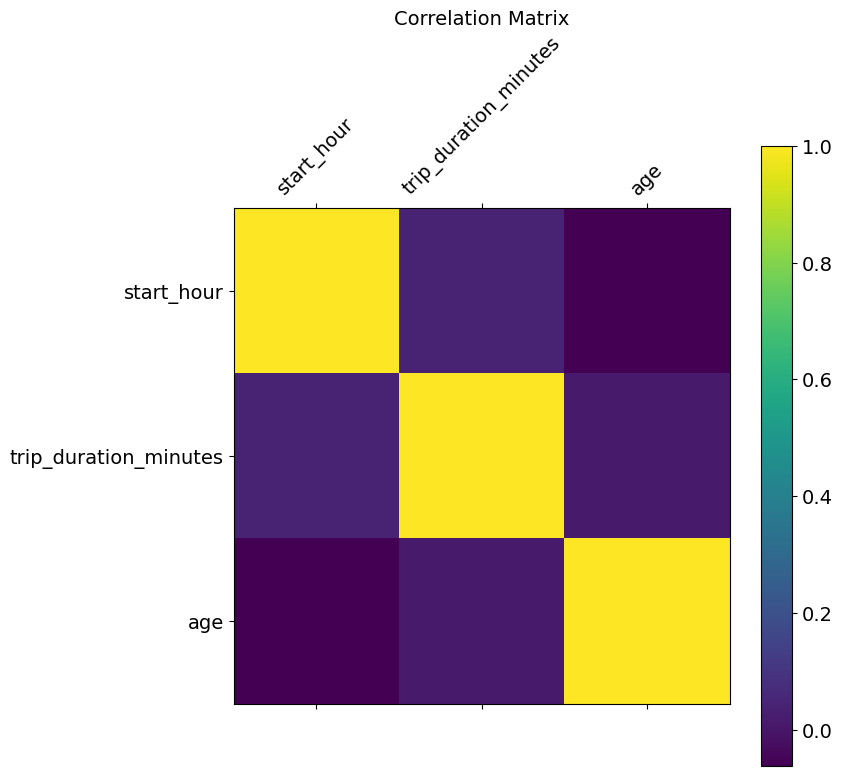

In [13]:
# add labels and legend
f= plt.figure(figsize=(8,8))
# figure size
plt.matshow(df_selected.corr(), fignum=f.number)
# type of plot
plt.xticks(range(df_selected.shape[1]),df_selected.columns, fontsize=14, rotation=45)
#x axis labels
plt.yticks(range(df_selected.shape[1]),df_selected.columns, fontsize=14)
# y axis labels
cb=plt.colorbar()
# add a color legend
cb.ax.tick_params(labelsize=14)
# add a font size
plt.title('Correlation Matrix',fontsize=14)
# add title
plt.show()

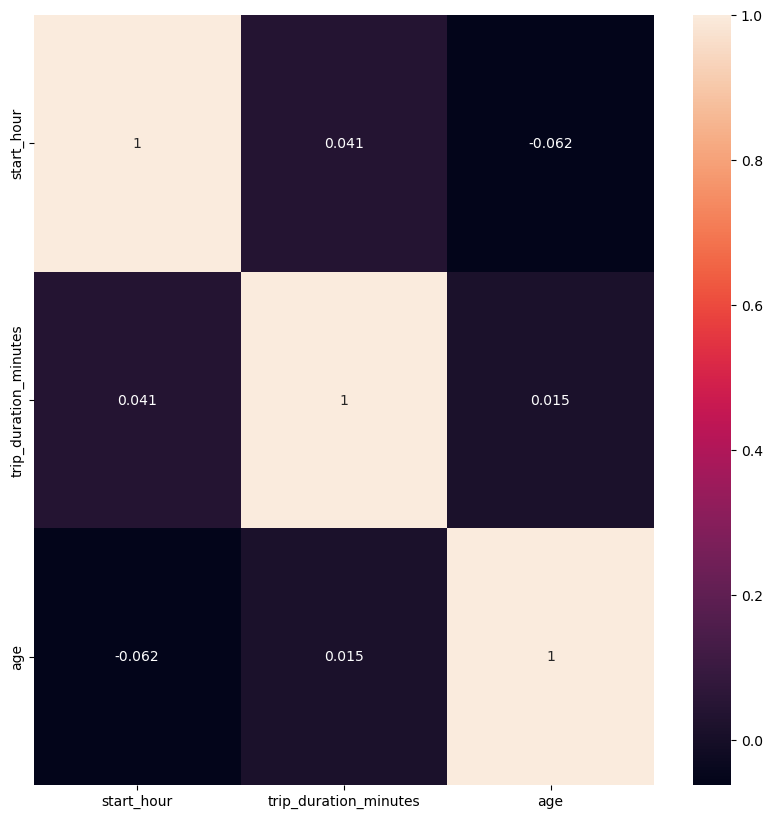

In [14]:
#Create a correlation heatmap using seaborn:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_selected.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
# Display the figure
plt.show()